In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def initialize_board(n):
    
    # Intializing the board and the center value being 1
    board = np.zeros(( 2*n + 1, 2*n + 1),int)
    board[n][n] = 1
    flag = 1
   
    for i in range (1,n+1):
        
        # Moving the index up
        for j in range (0,2*i):
            flag += 1
            
            board[n-j+i-1][n+i] = flag
        
        # Moving the index left
        for j in range (0,2*i):
            flag += 1
           
            board[n-i][n+i-j-1] = flag
       
        #Moving the index down
        for j in range (0,2*i):
            flag += 1
            
            board[n-i+j+1][n-i] = flag
                 
        # Moving the index right
        for j in range (0,2*i):
            flag += 1
            
            board[n+i][n-i+j+1] = flag
        
    return board

In [6]:
initialize_board(3)

array([[37, 36, 35, 34, 33, 32, 31],
       [38, 17, 16, 15, 14, 13, 30],
       [39, 18,  5,  4,  3, 12, 29],
       [40, 19,  6,  1,  2, 11, 28],
       [41, 20,  7,  8,  9, 10, 27],
       [42, 21, 22, 23, 24, 25, 26],
       [43, 44, 45, 46, 47, 48, 49]])

In [7]:
def simulate_walk(board):
    
    
    reference = len(board)                       #Python list method len () returns the number of elements in the list
    c = (reference-1) / 2                            #centro, andava bene anche n come nel def precedente
    current_position = (c,c)                         # center coord, the knight starts here

    moves = (-1,-2), (-1,2), (1,-2), (1,2), (-2,-1), (-2,1), (2,-1), (2,1)      # knight's moves

    sequence = [board[int(current_position[0]), int(current_position[1])]]              # sequence, start with the initial positicion (center of the matrix)

    x_coordinates = [c]          

    y_coordinates = [c]

    counter_invalid_moves = 0

  
    
    while counter_invalid_moves < len(moves):      # mentre le mosse che non vanno bene sono minori delle mosse totali fattibili (altrimenti si blocca e il gioco finisce):                            

    # Finding the min position:


        temp_min_value_move = pow(reference,2)  # inizializzo il minimo al valore massimo possibile

        for i in range(len(moves)):

            # valore della casella in cui mi posso spostare con la mossa i:

            temp_x_coordinate_i = int(current_position[0]) + int(moves[i][0])

            temp_y_coordinate_i = int(current_position[1]) + int(moves[i][1])


             #il cavallo non deve uscire dalla reference -> deve ignorare la mossa che non è ammissibile:
            
            if ( 0 <= temp_x_coordinate_i < reference ) and ( 0 <=  temp_y_coordinate_i < reference ):

                temp_value_at_i_move = board[temp_x_coordinate_i, temp_y_coordinate_i]
                # print(f'\n[per TEST] {type(temp_value_at_i_move)} temp_value_at_i_move: {temp_value_at_i_move}\n') # per TEST

                if ( temp_value_at_i_move <= temp_min_value_move ) and ( temp_value_at_i_move not in(sequence) ):

                    # contatore mosse che non vanno bene (per conoscere quando finire il ciclo (nessuna mossa va bene))
                    counter_invalid_moves = 0
                    temp_min_value_move = temp_value_at_i_move
                     # print(f'\n[per TEST] {type(temp_min_value_move)} temp_min_value_move: {temp_min_value_move}\n') # per TEST

                    i_chosen_move = i

                else:

                    # contatore mosse che non vanno bene (per conoscere quando finire il ciclo (nessuna mossa va bene))

                    counter_invalid_moves += 1

            else:

                counter_invalid_moves += 1


        if counter_invalid_moves < len(moves):

            temp_x_coordinate_chosen_i = int(current_position[0]) + int(moves[i_chosen_move][0])

            temp_y_coordinate_chosen_i = int(current_position[1]) + int(moves[i_chosen_move][1])

            # mi sposto:

            current_position = (temp_x_coordinate_chosen_i, temp_y_coordinate_chosen_i)   # salvo le coordinate dello
                                                                                        #   spostamento nella variabile
                                                                                        # aggiungo il valore e le coordinate in cui mi sono spostato:

            # ricontrollo se ha superato il limite per evitare errori:
            #appendo i valori raccolti nlle liste inizializzate prima

            if ( 0 <= temp_x_coordinate_i < reference ) and ( 0 <=  temp_y_coordinate_i < reference ):

                sequence.append(board[int(current_position[0]), int(current_position[1])])

                x_coordinates.append(temp_x_coordinate_chosen_i)

                y_coordinates.append(temp_y_coordinate_chosen_i)
    n = int(len(board) / 2)
    for _ in range (len(sequence)):
        x_coordinates[_] -= n
        y_coordinates[_] *= (-1)
        y_coordinates[_] += n

    
  
    
    return ( sequence, x_coordinates, y_coordinates)

In [8]:
simulate_walk(initialize_board(3))

([1,
  10,
  3,
  6,
  9,
  4,
  7,
  2,
  5,
  8,
  11,
  14,
  29,
  15,
  12,
  27,
  23,
  39,
  16,
  19,
  22,
  18,
  35,
  38],
 [0.0,
  1,
  -1,
  0,
  1,
  -1,
  1,
  0,
  -1,
  1,
  0,
  -2,
  -1,
  -2,
  -1,
  1,
  2,
  -1,
  -2,
  0,
  2,
  -1,
  -3,
  -2],
 [0.0,
  -2,
  -1,
  1,
  -1,
  0,
  1,
  -1,
  1,
  0,
  -2,
  -1,
  -3,
  0,
  -2,
  -3,
  0,
  3,
  1,
  2,
  1,
  2,
  1,
  3])

last element =  38


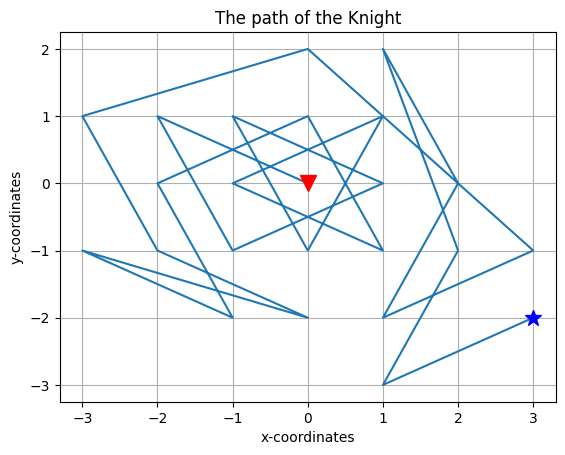

In [9]:
board = initialize_board(3)
sequence,x_coordinates,y_coordinates = simulate_walk(board);
reference = len(board)


fig,ax=plt.subplots()

print("last element = ", int(sequence[-1]))
plt.plot(y_coordinates,x_coordinates)
plt.plot(y_coordinates[0],x_coordinates[0], color = "r", marker="v",  markersize=12)
plt.plot(y_coordinates[-1],x_coordinates[-1], color = "b", marker="*",  markersize=12)
plt.title("The path of the Knight")
plt.xlabel("x-coordinates")
plt.ylabel("y-coordinates")
plt.axis('tight')
plt.grid(True)

#fig.set_size_inches(10,10)